# Visualisation 3 (Week 5) – Cases code + Graph


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
#Read in from Raw url , updates everyday.
confirmed = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
#Create a dataframe with confirmed cases and turns the date columsn into date objects instead of strings
df = pd.read_csv(confirmed, parse_dates=True)
#Drop the province/state column as it is redundent for our objective
df.drop(columns=['Province/State','Lat','Long'], inplace = True )
#Melt function to narrow our dataframe and make Date it's own columm / index
df = df.melt(['Country/Region'],df.drop('Country/Region', axis=1),'Date', 'Confirmed', 0)

#setting country and date as our index for later iterations and data manipulation
df = df.set_index(['Country/Region', 'Date'])
#Group by country / date to see each country in order with every date + add confirmed cases column
df = df.groupby(['Country/Region', 'Date'])['Confirmed'].sum()
df = pd.DataFrame(df)
#Reset index so we can access Date adn change all the dates to datetime objects.
df = df.reset_index()
df['Date'] = pd.to_datetime(df['Date'])
#Reset index to allow for sorting in alphabetical order 
df = df.set_index(['Country/Region', 'Date'])
df = df.sort_values(['Country/Region', 'Date'], ascending = True)
df

Confirmed
Country/Region Date                 
Afghanistan    2020-01-22          0
               2020-01-23          0
               2020-01-24          0
               2020-01-25          0
               2020-01-26          0
...                              ...
Zimbabwe       2021-02-14      35172
               2021-02-15      35222
               2021-02-16      35315
               2021-02-17      35423
               2021-02-18      35543

[75648 rows x 1 columns]

### Adding new daily cases column, setting all n/a values to 0


In [2]:
df['Daily'] = df['Confirmed'].diff().fillna(0)
df

Confirmed  Daily
Country/Region Date                        
Afghanistan    2020-01-22          0    0.0
               2020-01-23          0    0.0
               2020-01-24          0    0.0
               2020-01-25          0    0.0
               2020-01-26          0    0.0
...                              ...    ...
Zimbabwe       2021-02-14      35172   68.0
               2021-02-15      35222   50.0
               2021-02-16      35315   93.0
               2021-02-17      35423  108.0
               2021-02-18      35543  120.0

[75648 rows x 2 columns]

### Drops all rows with False entries i.e. entries less than 0

In [3]:
df['True/False'] = df['Daily'].apply(lambda x: x >= 0)
df = df.loc[df['True/False'], :]
df = df.drop('True/False', axis=1)
df

Confirmed  Daily
Country/Region Date                        
Afghanistan    2020-01-22          0    0.0
               2020-01-23          0    0.0
               2020-01-24          0    0.0
               2020-01-25          0    0.0
               2020-01-26          0    0.0
...                              ...    ...
Zimbabwe       2021-02-14      35172   68.0
               2021-02-15      35222   50.0
               2021-02-16      35315   93.0
               2021-02-17      35423  108.0
               2021-02-18      35543  120.0

[75402 rows x 2 columns]

### Get list of countries similar to week 4

In [4]:
countries = set()
for row in df.iterrows():
    countries.add(row[0][0])
    
countries

{'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

### Similar to week 4 again, I reset the index to have easier access to data for graphing.

In [5]:
df = df.reset_index()
df

,Country/Region,Date,Confirmed,Daily
0,Afghanistan,2020-01-22,0,0.0
1,Afghanistan,2020-01-23,0,0.0
2,Afghanistan,2020-01-24,0,0.0
3,Afghanistan,2020-01-25,0,0.0
4,Afghanistan,2020-01-26,0,0.0
...,...,...,...,...
75397,Zimbabwe,2021-02-14,35172,68.0
75398,Zimbabwe,2021-02-15,35222,50.0
75399,Zimbabwe,2021-02-16,35315,93.0
75400,Zimbabwe,2021-02-17,35423,108.0


###  Graph code

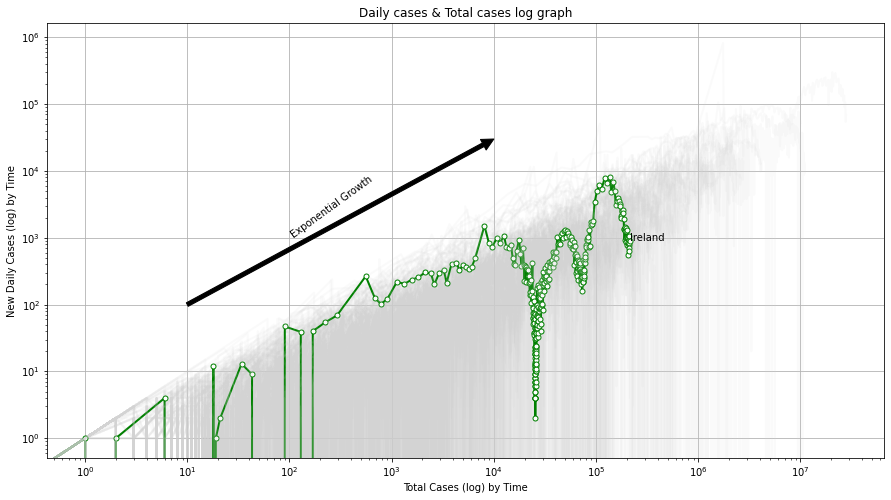

In [7]:
fig = plt.figure(figsize=(15,8))

for country in countries:
    country_df = df[df['Country/Region'] == country ]
    daily_list = country_df['Daily'].tolist()
    total_list = country_df['Confirmed'].tolist()
    x = total_list
    y = daily_list
    
    plt.plot(x, y, label = country, color = 'lightgrey', linewidth=2, alpha=0.1)
    
#     if country == 'US':
#         plt.plot(x, y, label = country, color='blue', linewidth=1)
#         plt.plot(x, y, label = country, marker='o', markerfacecolor='white', markersize=5, color='blue', linewidth=1)
#         plt.annotate(country , xy=(total_list[-1] + 10000, daily_list[-1] + 2), color='Black')
                     
    if country == 'Ireland':
        plt.plot(x, y, label = country, marker='o', markerfacecolor='white', markersize=5, color='Green', linewidth=2)
        plt.annotate(country , xy=(total_list[-1] + 1000, daily_list[-1] + 2), color='Black')
        
#     if country == 'Spain':
#         plt.plot(x, y, label = country, marker='o', markerfacecolor='white', markersize=5, color='red', linewidth=2)
#         plt.annotate(country , xy=(total_list[-1] + 10000, daily_list[-1] + 2), color='Black')

#     if country == 'China':
#         plt.plot(x, y, label = country, marker='o', markerfacecolor='white', markersize=5, color='magenta', linewidth=2)
#         plt.annotate(country , xy=(total_list[-1] + 10000, daily_list[-1] + 2), color='Black')
        
#     if country == 'Korea, South':
#         plt.plot(x, y, label = country, marker='o', markerfacecolor='white', markersize=5, color='Yellow', linewidth=2)
#         plt.annotate(country , xy=(total_list[-1] + 2, daily_list[-1] + 2), color='Black')
    
plt.title("Daily cases & Total cases log graph")
plt.xlabel("Total Cases (log) by Time")
plt.ylabel("New Daily Cases (log) by Time")
plt.yscale('log')
plt.xscale('log')
plt.annotate('', xy=(10000,30000), xytext=(10,100), arrowprops=dict(facecolor='k',shrink=100),
            horizontalalignment='right', verticalalignment='bottom')
plt.annotate('Exponential Growth', xy=(10000,15000), xytext=(100,1000), rotation = 36)
plt.grid(True)
plt.show()

In [25]:
# Checking the DF for irregular values 
country_df = df[df['Country/Region'] == 'Ireland' ]
country_df.head(60)

,Country/Region,Date,Confirmed,Daily
13368,Ireland,2020-05-02,21176,343.0
13369,Ireland,2020-05-03,21506,330.0
13370,Ireland,2020-05-04,21772,266.0
13371,Ireland,2020-05-05,21983,211.0
13372,Ireland,2020-05-06,22248,265.0
13373,Ireland,2020-05-07,22385,137.0
13374,Ireland,2020-05-08,22541,156.0
13375,Ireland,2020-05-09,22760,219.0
13376,Ireland,2020-05-10,22996,236.0
13377,Ireland,2020-05-11,23135,139.0
